<h1> <i>Consejo Constitucional</i>  2023 Chile Elections   </h1>
<h2>  Participation and voter characterization data  </h2>

Our goal is to process the data to create a set of user-friendly tables for analysis in LookerStudio. This will help visualize the election results across Chile using a dashboard that includes a georeferenced map showing each voting location.

In a previous notebook, we added coordinates to all voting locations and recorded the votes per candidate at each location.

Now, we will focus on wrangling participation data and georeferencing the results. Additionally, we will georeference the voter distribution by age and gender using the latitude and longitude coordinates obtained earlier.




In [308]:
import pandas as pd

In [309]:
import matplotlib.pyplot as plt

In [310]:
import seaborn as sns

In [311]:
#Load the file with the participation data
participation=pd.read_excel(r"C:\Users\gzuni\2023_05_CCG.xlsx", sheet_name=1)

In [312]:
#checking data loaded correctly
participation.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Participación Consejo Constitucional 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Nro.Región,Región,Circunscripción senatorial,Distrito,Comuna,Circunscripción electoral,Local,Mesa,Inscritos,Votos
6,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,61,400,321
7,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,62,400,296
8,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,63,400,305
9,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,64,400,316


In [313]:
#Now we rename the columns and eliminate the first empty rows
name_col=participation.iloc[5].tolist()
participation.columns=name_col

In [315]:
participation.head(10)

,Nro.Región,Región,Circunscripción senatorial,Distrito,Comuna,Circunscripción electoral,Local,Mesa,Inscritos,Votos
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Participación Consejo Constitucional 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Nro.Región,Región,Circunscripción senatorial,Distrito,Comuna,Circunscripción electoral,Local,Mesa,Inscritos,Votos
6,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,61,400,321
7,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,62,400,296
8,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,63,400,305
9,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,64,400,316


In [316]:
participation=participation.iloc[6:]
participation.head(5)

,Nro.Región,Región,Circunscripción senatorial,Distrito,Comuna,Circunscripción electoral,Local,Mesa,Inscritos,Votos
6,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,61,400,321
7,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,62,400,296
8,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,63,400,305
9,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,64,400,316
10,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,65,400,305


In [317]:
# Reset index
participation = participation.reset_index(drop=True)
participation.head(2)

,Nro.Región,Región,Circunscripción senatorial,Distrito,Comuna,Circunscripción electoral,Local,Mesa,Inscritos,Votos
0,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,61,400,321
1,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,62,400,296


In [318]:
# we look for NaN data we need to fill
print('Nro.Región_NaN ='+ str(participation['Nro.Región'].isna().sum()))
print('Region_nan ='+ str(participation['Región'].isna().sum()))
print('Circunscripcion_senatorial_nan ='+ str(participation['Circunscripción senatorial'].isna().sum()))
print('Distrito_nan ='+ str(participation['Distrito'].isna().sum()))
print('Comuna_nan ='+ str(participation['Comuna'].isna().sum()))
print('Circunscripcion_electoral_nan ='+ str(participation['Circunscripción electoral'].isna().sum()))
print('Local_Nan ='+ str(participation['Local'].isna().sum()))
print('Mesa_Nan ='+ str(participation['Mesa'].isna().sum()))
print('Inscritos_Nan ='+ str(participation['Inscritos'].isna().sum()))
print('Votos_Nan ='+ str(participation['Votos'].isna().sum()))



Nro.Región_NaN =0
Region_nan =0
Circunscripcion_senatorial_nan =0
Distrito_nan =0
Comuna_nan =0
Circunscripcion_electoral_nan =0
Local_Nan =0
Mesa_Nan =0
Inscritos_Nan =0
Votos_Nan =0


In [319]:
# we drop the column 'mesa' and add the total registered voters and votes
participation_sum=participation.drop(columns=['Mesa'])


In [320]:
grouped = participation_sum.groupby(['Nro.Región', 'Región', 'Circunscripción senatorial', 'Distrito', 'Comuna', 'Circunscripción electoral', 'Local'], as_index=False)

# Perform the sum on both 'Votos' and 'Inscritos' columns
participation_sum = grouped[['Votos', 'Inscritos']].sum()

In [321]:
participation_sum.head(2)

,Nro.Región,Región,Circunscripción senatorial,Distrito,Comuna,Circunscripción electoral,Local,Votos,Inscritos
0,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,2525,3264
1,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,C.P. ALTO HOSPICIO,38,56


In [322]:
#we add the 'ubicacion column' so we can later add the coordinates
ubicaciones = pd.DataFrame(participation_sum[['Local', 'Comuna']].apply(lambda x: f"{x['Local']}, {x['Comuna']}", axis=1))

participation_sum['nombre_local_comuna']=ubicaciones
participation_sum.head(5)

,Nro.Región,Región,Circunscripción senatorial,Distrito,Comuna,Circunscripción electoral,Local,Votos,Inscritos,nombre_local_comuna
0,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,2525,3264,"ANEXO DE COLEGIO SAN ANTONIO DE MATILLA, ALTO ..."
1,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,C.P. ALTO HOSPICIO,38,56,"C.P. ALTO HOSPICIO, ALTO HOSPICIO"
2,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,COLEGIO CATOLICO NAZARET,5069,6400,"COLEGIO CATOLICO NAZARET, ALTO HOSPICIO"
3,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,COLEGIO MARISTA HERMANO FERNANDO,4331,5600,"COLEGIO MARISTA HERMANO FERNANDO, ALTO HOSPICIO"
4,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,COLEGIO METODISTA WILLIAM TAYLOR,4749,6000,"COLEGIO METODISTA WILLIAM TAYLOR, ALTO HOSPICIO"


In [323]:
#adding a column that represents the % of participation per location
participation_sum['% participacion']=participation_sum['Votos']/participation_sum['Inscritos']


In [324]:
participation_sum.head(2)

,Nro.Región,Región,Circunscripción senatorial,Distrito,Comuna,Circunscripción electoral,Local,Votos,Inscritos,nombre_local_comuna,% participacion
0,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,2525,3264,"ANEXO DE COLEGIO SAN ANTONIO DE MATILLA, ALTO ...",0.773591
1,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,C.P. ALTO HOSPICIO,38,56,"C.P. ALTO HOSPICIO, ALTO HOSPICIO",0.678571


In [325]:
#Add a column with the number of voters that did not participate
participation_sum['no_votan']=participation_sum['Inscritos']-participation_sum['Votos']

In [326]:
participation_sum.head(2)

,Nro.Región,Región,Circunscripción senatorial,Distrito,Comuna,Circunscripción electoral,Local,Votos,Inscritos,nombre_local_comuna,% participacion,no_votan
0,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,2525,3264,"ANEXO DE COLEGIO SAN ANTONIO DE MATILLA, ALTO ...",0.773591,739
1,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,C.P. ALTO HOSPICIO,38,56,"C.P. ALTO HOSPICIO, ALTO HOSPICIO",0.678571,18


In [327]:
# We export a copy of this result for backup
participation_sum.to_csv('participaction_sum.csv')

In [329]:
#we add the coordinates generated on the previos notebook
coord=pd.read_csv(r"C:\Users\gzuni\lat_lon.csv")


In [330]:
coord.head(2)

,nombre_local_comuna,Latitude,Longitude,coordinates
0,"ANEXO DE COLEGIO SAN ANTONIO DE MATILLA, ALTO ...",-20.270390,-70.10254,"-20.27039,-70.10253999999999"
1,"C.P. ALTO HOSPICIO, ALTO HOSPICIO",-20.239432,-70.05358,"-20.2394325,-70.0535802"


In [331]:
participation_final=pd.merge(left=participation_sum,right=coord,how='left')

In [332]:
participation_final.head(3)

,Nro.Región,Región,Circunscripción senatorial,Distrito,Comuna,Circunscripción electoral,Local,Votos,Inscritos,nombre_local_comuna,% participacion,no_votan,Latitude,Longitude,coordinates
0,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,2525,3264,"ANEXO DE COLEGIO SAN ANTONIO DE MATILLA, ALTO ...",0.773591,739,-20.270390,-70.102540,"-20.27039,-70.10253999999999"
1,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,C.P. ALTO HOSPICIO,38,56,"C.P. ALTO HOSPICIO, ALTO HOSPICIO",0.678571,18,-20.239432,-70.053580,"-20.2394325,-70.0535802"
2,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,COLEGIO CATOLICO NAZARET,5069,6400,"COLEGIO CATOLICO NAZARET, ALTO HOSPICIO",0.792031,1331,-20.246992,-70.095767,"-20.2469916,-70.0957675"


In [334]:
#we export the final file 
participation_final.to_csv('participation_final.csv',index=False)

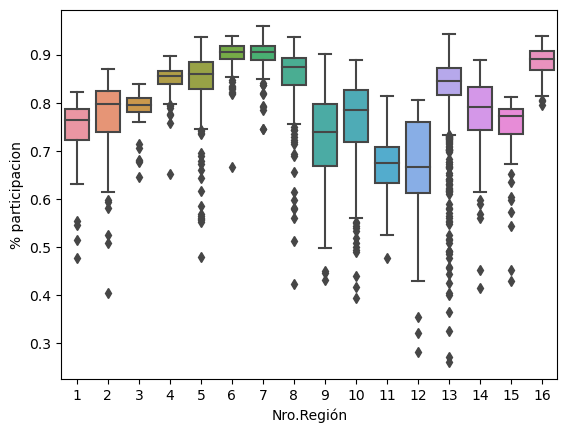

In [335]:
#We take a look at the participation rate across the country. We see significant differences from each region
sns.boxplot(data=participation_final, x='Nro.Región', y='% participacion')

# Show the plot
plt.show()

In [336]:
#we take a look at the 'Magallanes' region to take a closer look at each 'comuna'
magallanes = participation_final[participation_final['Nro.Región'] == 12]

In [337]:
magallanes.head(2)

,Nro.Región,Región,Circunscripción senatorial,Distrito,Comuna,Circunscripción electoral,Local,Votos,Inscritos,nombre_local_comuna,% participacion,no_votan,Latitude,Longitude,coordinates
1675,12,DE MAGALLANES Y DE LA ANTARTICA CHILENA,CIRCUNSCRIPCION SENATORIAL 15,DISTRITO 28,ANTARTICA,ANTARTICA,ESCUELA BASICA VILLA LAS ESTRELLAS,61,172,"ESCUELA BASICA VILLA LAS ESTRELLAS, ANTARTICA",0.354651,111,-62.199794,-58.965583,"-62.19979430000001,-58.9655829"
1676,12,DE MAGALLANES Y DE LA ANTARTICA CHILENA,CIRCUNSCRIPCION SENATORIAL 15,DISTRITO 28,CABO DE HORNOS(EX-NAVARINO),CABO DE HORNOS(EX-NAVARINO),LICEO DONALD MC-INTYRE GRIFFITHS,1027,1679,"LICEO DONALD MC-INTYRE GRIFFITHS, CABO DE HORN...",0.611674,652,-54.934615,-67.605554,"-54.9346149,-67.60555409999999"


Initial analysis of participation reveals distinct variations between regions and among 'comunas' (municipalities) within these regions. Since 2022, voting locations have been georeferenced by SERVEL (Chile's electoral office), theoretically assigning voters to the nearest polling station from their residences. Nationally, the average participation rate stands at approximately 80%. However, in areas where participation hovers around 60%, it is likely that a considerable number of voters have been inaccurately assigned to the voting locations (mostly small towns and rural areas), rendering them unable to vote on election day. This hypothesis requires further verification through supplementary data.

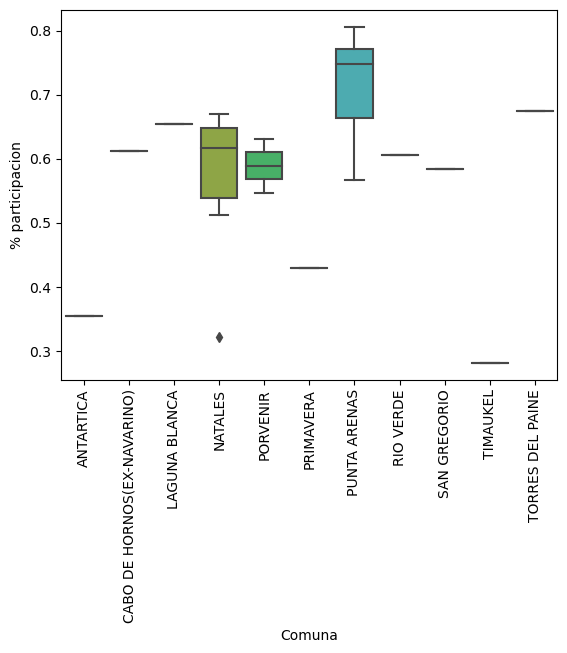

In [338]:
sns.boxplot(data=magallanes, x='Comuna', y='% participacion')

plt.xticks(rotation=90)
# Show the plot
plt.show()

In [339]:
#Loading the file with the voters description data
descr_votantes=pd.read_excel(r"C:\Users\gzuni\2023_05_CCG.xlsx", sheet_name=2)


In [340]:
descr_votantes.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Descripción de votantes en elección Consejo Co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Nro.Región,Región,Circunscripción senatorial,Distrito,Comuna,Circunscripción electoral,Local,Mesa,Sexo,Rango etario,Nacionalidad,Votantes
6,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,61,HOMBRES,18-19,CHILE,15
7,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,61,HOMBRES,20-29,BOLIVIA,2
8,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,61,HOMBRES,20-29,CHILE,38
9,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,61,HOMBRES,30-39,BOLIVIA,4


In [341]:
name_col2=descr_votantes.iloc[5].tolist()
descr_votantes.columns=name_col2

In [342]:
descr_votantes.head(2)

,Nro.Región,Región,Circunscripción senatorial,Distrito,Comuna,Circunscripción electoral,Local,Mesa,Sexo,Rango etario,Nacionalidad,Votantes
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Descripción de votantes en elección Consejo Co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [343]:
descr_votantes=descr_votantes.iloc[6:]

In [344]:
descr_votantes.reset_index(inplace=True, drop=True)
descr_votantes.head(2)

,Nro.Región,Región,Circunscripción senatorial,Distrito,Comuna,Circunscripción electoral,Local,Mesa,Sexo,Rango etario,Nacionalidad,Votantes
0,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,61,HOMBRES,18-19,CHILE,15
1,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,61,HOMBRES,20-29,BOLIVIA,2


In [345]:
# we look for NaN data we need to fill
print('Nro.Región_NaN ='+ str(descr_votantes['Nro.Región'].isna().sum()))
print('Region_nan ='+ str(descr_votantes['Región'].isna().sum()))
print('Circunscripcion_senatorial_nan ='+ str(descr_votantes['Circunscripción senatorial'].isna().sum()))
print('Distrito_nan ='+ str(descr_votantes['Distrito'].isna().sum()))
print('Comuna_nan ='+ str(descr_votantes['Comuna'].isna().sum()))
print('Circunscripcion_electoral_nan ='+ str(descr_votantes['Circunscripción electoral'].isna().sum()))
print('Local_Nan ='+ str(descr_votantes['Local'].isna().sum()))
print('Mesa_Nan ='+ str(descr_votantes['Mesa'].isna().sum()))
print('Inscritos_Nan ='+ str(descr_votantes['Sexo'].isna().sum()))
print('Votos_Nan ='+ str(descr_votantes['Rango etario'].isna().sum()))
print('Votos_Nan ='+ str(descr_votantes['Votantes'].isna().sum()))


Nro.Región_NaN =0
Region_nan =0
Circunscripcion_senatorial_nan =0
Distrito_nan =0
Comuna_nan =0
Circunscripcion_electoral_nan =0
Local_Nan =0
Mesa_Nan =0
Inscritos_Nan =0
Votos_Nan =0
Votos_Nan =0


In [346]:
descr_votantes_sum=descr_votantes.drop(columns=['Mesa'])

In [347]:
grouped = descr_votantes_sum.groupby(['Nro.Región', 'Región', 'Circunscripción senatorial', 'Distrito', 'Comuna', 'Circunscripción electoral', 'Local','Sexo','Rango etario','Nacionalidad'], as_index=False)

# Perform the sum on both 'Votos' and 'Inscritos' columns
descr_votantes_sum = grouped[['Votantes']].sum()

In [348]:
descr_votantes_sum.head(2)

,Nro.Región,Región,Circunscripción senatorial,Distrito,Comuna,Circunscripción electoral,Local,Sexo,Rango etario,Nacionalidad,Votantes
0,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,HOMBRES,18-19,BOLIVIA,3
1,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,HOMBRES,18-19,CHILE,68


In [349]:
ubicaciones = pd.DataFrame(descr_votantes_sum[['Local', 'Comuna']].apply(lambda x: f"{x['Local']}, {x['Comuna']}", axis=1))

descr_votantes_sum['nombre_local_comuna']=ubicaciones


In [350]:
descr_votantes_sum.head(2)

,Nro.Región,Región,Circunscripción senatorial,Distrito,Comuna,Circunscripción electoral,Local,Sexo,Rango etario,Nacionalidad,Votantes,nombre_local_comuna
0,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,HOMBRES,18-19,BOLIVIA,3,"ANEXO DE COLEGIO SAN ANTONIO DE MATILLA, ALTO ..."
1,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,HOMBRES,18-19,CHILE,68,"ANEXO DE COLEGIO SAN ANTONIO DE MATILLA, ALTO ..."


In [351]:
no_votantes = descr_votantes_sum.groupby(['nombre_local_comuna']).agg(Total_Votantes=('Votantes', 'sum')).reset_index()


In [352]:
no_votantes

,nombre_local_comuna,Total_Votantes
0,"ALIANZA FRANCESA, VITACURA",4990
1,"ALIANZA FRANCESA, VIÑA DEL MAR",7821
2,"ANEXO DE COLEGIO SAN ANTONIO DE MATILLA, ALTO ...",2520
3,"ANEXO ENRIQUE ZAÑARTU PRIETO, CABRERO",3117
4,"ANEXO INSTITUTO PEDRO PRADO, LO PRADO",5977
...,...,...
2927,"UNIVERSIDAD DE VIÑA DEL MAR, SEDE MIRAFLORES (...",2956
2928,"UNIVERSIDAD FEDERICO SANTA MARIA EDIFICIO P, V...",7641
2929,"UNIVERSIDAD TECNOLOGICA DE CHILE INACAP, TALCA",10886
2930,"UNIVERSIDAD TECNOLOGICA DE CHILE INACAP, VALPA...",5381


In [353]:
participation_final=pd.read_csv(r'participation_final.csv')

In [354]:
participation_final.head(2)

,Nro.Región,Región,Circunscripción senatorial,Distrito,Comuna,Circunscripción electoral,Local,Votos,Inscritos,nombre_local_comuna,% participacion,no_votan,Latitude,Longitude,coordinates
0,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,2525,3264,"ANEXO DE COLEGIO SAN ANTONIO DE MATILLA, ALTO ...",0.773591,739,-20.270390,-70.10254,"-20.27039,-70.10253999999999"
1,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,C.P. ALTO HOSPICIO,38,56,"C.P. ALTO HOSPICIO, ALTO HOSPICIO",0.678571,18,-20.239432,-70.05358,"-20.2394325,-70.0535802"


In [355]:
inscritos = participation_final.groupby(['nombre_local_comuna']).agg(Total_Inscritos=('Inscritos', 'sum')).reset_index()

In [356]:
inscritos

,nombre_local_comuna,Total_Inscritos
0,"ALIANZA FRANCESA, VITACURA",6800
1,"ALIANZA FRANCESA, VIÑA DEL MAR",10000
2,"ANEXO DE COLEGIO SAN ANTONIO DE MATILLA, ALTO ...",3264
3,"ANEXO ENRIQUE ZAÑARTU PRIETO, CABRERO",3600
4,"ANEXO INSTITUTO PEDRO PRADO, LO PRADO",7200
...,...,...
2927,"UNIVERSIDAD DE VIÑA DEL MAR, SEDE MIRAFLORES (...",4800
2928,"UNIVERSIDAD FEDERICO SANTA MARIA EDIFICIO P, V...",9384
2929,"UNIVERSIDAD TECNOLOGICA DE CHILE INACAP, TALCA",12000
2930,"UNIVERSIDAD TECNOLOGICA DE CHILE INACAP, VALPA...",6596


In [357]:
descr_votantes_final=pd.merge(left=descr_votantes_sum,right=inscritos,how='left')


In [358]:
descr_votantes_final=pd.merge(left=descr_votantes_final,right=coord,how='left')

In [359]:
descr_votantes_final=pd.merge(left=descr_votantes_final,right=no_votantes,how='left')

In [360]:
descr_votantes_final.head(2)

,Nro.Región,Región,Circunscripción senatorial,Distrito,Comuna,Circunscripción electoral,Local,Sexo,Rango etario,Nacionalidad,Votantes,nombre_local_comuna,Total_Inscritos,Latitude,Longitude,coordinates,Total_Votantes
0,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,HOMBRES,18-19,BOLIVIA,3,"ANEXO DE COLEGIO SAN ANTONIO DE MATILLA, ALTO ...",3264,-20.27039,-70.10254,"-20.27039,-70.10253999999999",2520
1,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,HOMBRES,18-19,CHILE,68,"ANEXO DE COLEGIO SAN ANTONIO DE MATILLA, ALTO ...",3264,-20.27039,-70.10254,"-20.27039,-70.10253999999999",2520


In [361]:
#we export the final final descr_votantes_final for backup
descr_votantes_final.to_csv('descr_votantes_final.csv',index=False)

In [70]:
descr_votantes_final.to_excel('descr_votantes_final.xlsx',index=False)

Since nationality data is available, we will create a file that details the composition of voters by nationality at each voting location

In [362]:
votersbynationality=descr_votantes_final.drop(columns=['Sexo','Rango etario'])

In [363]:
votersbynationality.head(2)

,Nro.Región,Región,Circunscripción senatorial,Distrito,Comuna,Circunscripción electoral,Local,Nacionalidad,Votantes,nombre_local_comuna,Total_Inscritos,Latitude,Longitude,coordinates,Total_Votantes
0,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,BOLIVIA,3,"ANEXO DE COLEGIO SAN ANTONIO DE MATILLA, ALTO ...",3264,-20.27039,-70.10254,"-20.27039,-70.10253999999999",2520
1,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,CHILE,68,"ANEXO DE COLEGIO SAN ANTONIO DE MATILLA, ALTO ...",3264,-20.27039,-70.10254,"-20.27039,-70.10253999999999",2520


In [364]:
#votersbynationality_sum=votersbynationality.groupby(['Nro.Región','Región','Circunscripción senatorial','Distrito','Comuna','Circunscripción electoral','Local','Nacionalidad','nombre_local_comuna','Total_Inscritos','Latitude','Longitude','coordinates'])['Votantes'].sum()
grouped = votersbynationality.groupby(['Nro.Región','Región','Circunscripción senatorial','Distrito','Comuna','Circunscripción electoral','Local','Nacionalidad','nombre_local_comuna','Total_Inscritos','Latitude','Longitude','coordinates','Total_Votantes'], as_index=False)

# Perform the sum on both 'Votos' and 'Inscritos' columns
votersbynationality_sum = grouped[['Votantes']].sum()

In [365]:
votersbynationality_sum.head(2)

,Nro.Región,Región,Circunscripción senatorial,Distrito,Comuna,Circunscripción electoral,Local,Nacionalidad,nombre_local_comuna,Total_Inscritos,Latitude,Longitude,coordinates,Total_Votantes,Votantes
0,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,BOLIVIA,"ANEXO DE COLEGIO SAN ANTONIO DE MATILLA, ALTO ...",3264,-20.27039,-70.10254,"-20.27039,-70.10253999999999",2520,168
1,1,DE TARAPACA,CIRCUNSCRIPCION SENATORIAL 2,DISTRITO 2,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,CHILE,"ANEXO DE COLEGIO SAN ANTONIO DE MATILLA, ALTO ...",3264,-20.27039,-70.10254,"-20.27039,-70.10253999999999",2520,2241


In [366]:
#exporting the data for backup
votersbynationality_sum.to_csv('votersbynationality_final.csv',index=False)

In [77]:
votersbynationality_sum.to_excel('votersbynationality_final.xlsx',index=False)